In [112]:
import json
import os
import shutil
import time
from base64 import b64decode
from io import BytesIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import PIL
import seaborn as sns


@register_cell_magic
def capture_png(line, cell):

    # init capturing cell output
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )

    code_block = cell

    argument_array = line.split('--style')
    path = argument_array[0].strip()
    path = path.split(".png")[0] + str(time.time_ns()) + ".png"
    if not path:
        raise ValueError('No path found!')

    individual_style = str(*argument_array[1:])
    individual_style = individual_style.strip()
    individual_style = individual_style.strip('"')  # remove quotes

    global cell_counter  # for highlighting the first cell
    cell_counter += 1
    if cell_counter == 1:
        first_highlight_style = "border: 3px solid #ED6A5A;"
    else:
        first_highlight_style = "border: 3px solid #008DD5;"

    style = first_highlight_style + individual_style

    # read + update + write json
    with open(joson_file_path, "r") as jsonFile:
        data = json.load(jsonFile)

    data[path[5:]] = [chapter_name, code_block, style]

    with open(joson_file_path, "w") as jsonFile:
        json.dump(data, jsonFile, indent=2)

    # save image
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')


# 2D Arrays

In [113]:
# init variables
cell_counter = 0
joson_file_path = "imgs/gallery_parameters.json"
chapter_name = "2D Arrays"

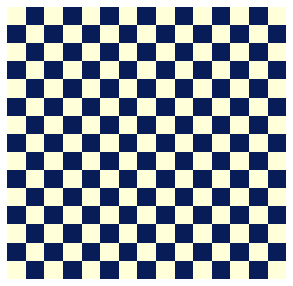

In [114]:
%%capture_png imgs/example.png   --style "border: 7px solid #ED6A5A"

def disp(x, sep=".0f", annot=False,  figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.axis("off")
    sns.heatmap(x, annot=annot, fmt=sep, cmap="YlGnBu", cbar=False)

#Checkboard
pixX, pixY= (15, 15)
array = [[(i+j)%2 for i in range(pixX)] for j in range(pixY)]
disp(array)

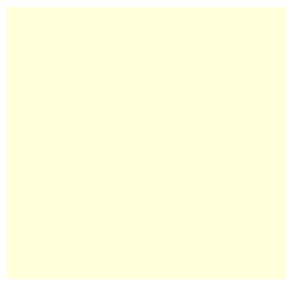

In [115]:
%%capture_png imgs/example.png --style "border: 3px solid #008DD5;"
#from 4 regions
array = np.ones((15,15))+30
disp(array)

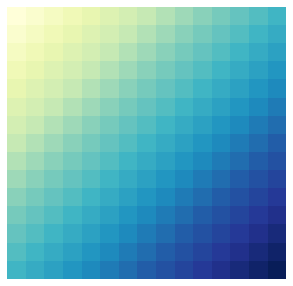

In [116]:
%%capture_png imgs/example.png
#Linear diagonal
array = [[i+j for i in range(pixX)] for j in range(pixY)]
disp(array)

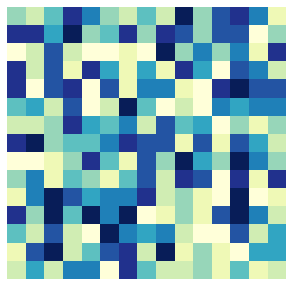

In [117]:
%%capture_png imgs/example.png
#Random
array = np.random.randint(0, 10, size=(15, 15))
disp(array)

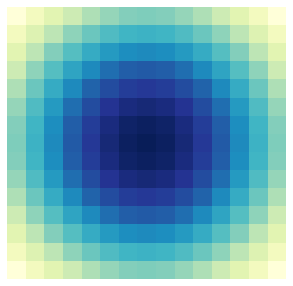

In [118]:
%%capture_png imgs/example.png
#Gaussian
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY))
d = np.sqrt(x**2+y**2)
sigma, mu = 1.0, 0.0
array = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
disp(array, sep='.1f' )

In [119]:
# 3D Arrays

In [120]:
# init variables
cell_counter = 0
joson_file_path = "imgs/gallery_parameters.json"
chapter_name = "More dimensions"

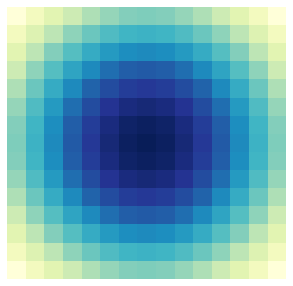

In [121]:
%%capture_png imgs/example.png --style "border: 5px solid #ED6A5A; width: 150px" 
#Gaussian
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY))
d = np.sqrt(x**2+y**2)
sigma, mu = 1.0, 0.0
array = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
disp(array, sep='.1f' )